# NDVI calculation using Python Rasterio

**Data specification**: _data_spec.txt_

Before to start, **add Rasterio library to your virtual env** (if not already installed):

`conda install -c conda-forge rasterio`

In [1]:
'''import libraries'''
import os
import rasterio as rio
import numpy as np
from rasterio.plot import show
import matplotlib.pyplot as plt

In [2]:
''' Set paths '''
# Full path to the RGB image (just to have an overviview)
rgb_image_path = r"planet_rgb.tiff" 

# Full path to the multispectral image
multiband_image_path = r'planet.tiff'

# Create an output folder where the output map will be stored
out_path = 'output'
os.mkdir(out_path)

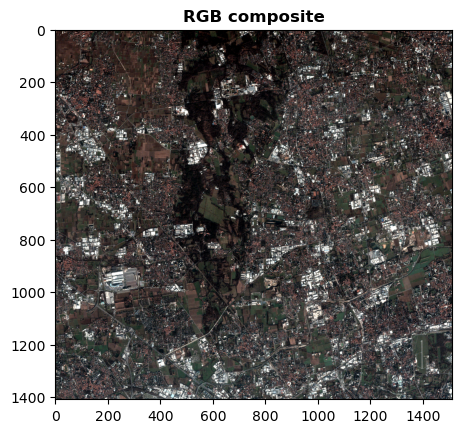

In [3]:
''' Plot the RGB image using the Rasterio plotting functions (useful for RGB composite or single band plots) '''
with rio.open(rgb_image_path) as rgb:
    show(rgb.read(), title='RGB composite')
#pixel row and column indexes are used as default ticks by the plt.imshow function on which rasterio.plot is based

In [4]:
''' Load Red and NIR bands from the real multispectral image
 (note all PlanetScope 4-band images have band order 1=Blue|2=Green|3=Red|4=Near-InfraRed) and
 each band is loaded as numpy nd array)'''
# Load Red band
with rio.open(multiband_image_path) as src:
    band_red = src.read(3).astype(rio.float32)
    
# Load NIR band 
with rio.open(multiband_image_path) as src:
    band_nir = src.read(4).astype(rio.float32)

In [5]:
'''Calculate NDVI (https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index)'''
# Allow division by zero (to prevent unwanted computation interruption due to possible NaN or 0 data)
np.seterr(divide='ignore', invalid='ignore')

# Run NDVI formula
ndvi = (band_nir - band_red) / (band_nir + band_red)

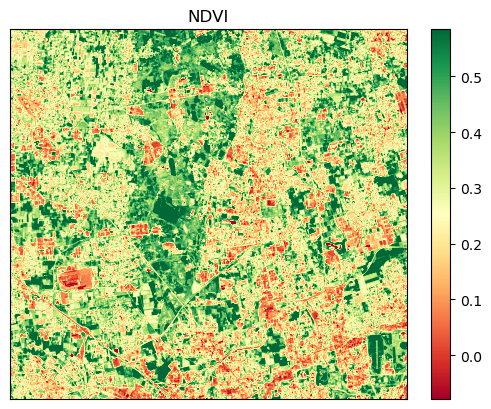

In [6]:
'''Plot the NDVI map (run all plt functions together!)'''
# To have a better visualization the color ramp is bounded between the 0.1 and the 0.9 quantiles of the NDVI distribution)
plt.imshow(ndvi, cmap="RdYlGn", vmin=-np.quantile(ndvi, 0.1), vmax=np.quantile(ndvi, 0.9))

# To not show ax ticks (optional)
plt.xticks([]) 
plt.yticks([])

# To add a title
plt.title('NDVI')

# To show the color bar legend
plt.colorbar()

In [ ]:
'''Save the NDVI map in a new spatial raster''' 
# Set spatial characteristics of the output object to mirror the input (using Rasterio method called .meta)
kwargs = src.meta
# Change the raster value type to 'float32' and specify that it will be a single-band raster
kwargs['dtype'] = 'float32'
kwargs['count'] = 1

# Save the map in the output folder
with rio.open(os.path.join(out_path,'ndvi.tiff'), 'w', **kwargs) as dst:
        dst.write_band(1, ndvi.astype(rio.float32))